In [9]:
install.packages("kknn")
library(kknn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
n = 250
sigmatrue = 0.01
ftrue <- c(
   0.4342,0.4402,0.4460,0.4515,0.4568,0.4618,0.4665,0.4712,0.4755,0.4797,
   0.4837,0.4875,0.4911,0.4945,0.4978,0.5009,0.5039,0.5067,0.5094,0.5119,
   0.5143,0.5166,0.5187,0.5208,0.5227,0.5245,0.5262,0.5278,0.5293,0.5307,
   0.5321,0.5333,0.5345,0.5355,0.5365,0.5375,0.5383,0.5391,0.5399,0.5405,
   0.5411,0.5417,0.5422,0.5426,0.5430,0.5434,0.5437,0.5440,0.5442,0.5444,
   0.5445,0.5447,0.5447,0.5448,0.5448,0.5448,0.5448,0.5447,0.5446,0.5445,
   0.5444,0.5442,0.5441,0.5439,0.5437,0.5434,0.5432,0.5429,0.5427,0.5424,
   0.5421,0.5418,0.5415,0.5412,0.5408,0.5405,0.5401,0.5398,0.5394,0.5390,
   0.5387,0.5383,0.5379,0.5375,0.5371,0.5367,0.5363,0.5359,0.5355,0.5351,
   0.5347,0.5343,0.5339,0.5335,0.5330,0.5326,0.5322,0.5318,0.5314,0.5310,
   0.5306,0.5302,0.5298,0.5294,0.5290,0.5286,0.5282,0.5278,0.5274,0.5270,
   0.5267,0.5263,0.5259,0.5255,0.5251,0.5248,0.5244,0.5240,0.5237,0.5233,
   0.5230,0.5226,0.5223,0.5219,0.5216,0.5213,0.5209,0.5206,0.5203,0.5200,
   0.5197,0.5193,0.5190,0.5187,0.5184,0.5181,0.5178,0.5176,0.5173,0.5170,
   0.5167,0.5164,0.5162,0.5159,0.5156,0.5154,0.5151,0.5149,0.5146,0.5144,
   0.5141,0.5139,0.5136,0.5134,0.5132,0.5130,0.5127,0.5125,0.5123,0.5121,
   0.5119,0.5117,0.5115,0.5113,0.5111,0.5109,0.5107,0.5105,0.5103,0.5101,
   0.5100,0.5098,0.5096,0.5094,0.5093,0.5091,0.5090,0.5088,0.5086,0.5085,
   0.5083,0.5082,0.5080,0.5079,0.5077,0.5076,0.5075,0.5073,0.5072,0.5071,
   0.5069,0.5068,0.5067,0.5066,0.5065,0.5063,0.5062,0.5061,0.5060,0.5059,
   0.5058,0.5057,0.5056,0.5055,0.5054,0.5053,0.5052,0.5051,0.5050,0.5049,
   0.5048,0.5047,0.5046,0.5045,0.5044,0.5044,0.5043,0.5042,0.5041,0.5041,
   0.5040,0.5039,0.5038,0.5038,0.5037,0.5036,0.5035,0.5035,0.5034,0.5034,
   0.5033,0.5032,0.5032,0.5031,0.5030,0.5030,0.5029,0.5029,0.5028,0.5028,
   0.5027,0.5027,0.5026,0.5026,0.5025,0.5025,0.5024,0.5024,0.5023,0.5023)

In [4]:
x = seq(0.5,3,length=250)

In [5]:
set.seed(123)
y     <- ftrue + rnorm(n, 0, sigmatrue)
ystar <- ftrue + rnorm(n, 0, sigmatrue)
train <- data.frame(x = x, y = y)
test  <- data.frame(x = x, y = ystar)

In [12]:
fit = kknn(y ~ x, train, test, kernel = "rectangular", k = 21)

In [13]:
# prompt: predict y from x

ypred <- fitted(fit)

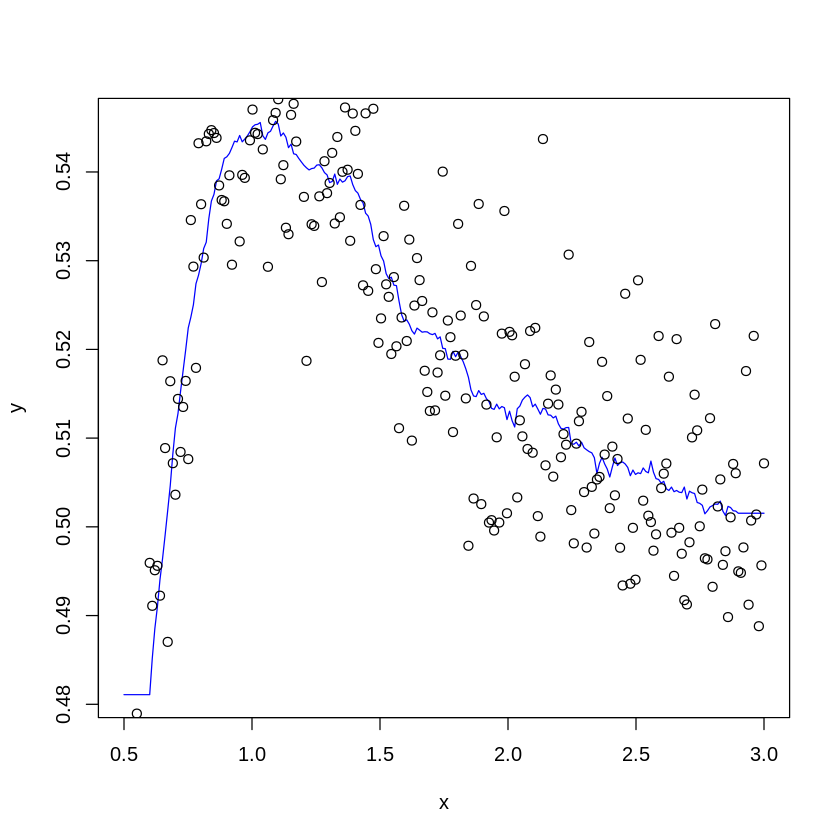

In [14]:
# prompt: plot ypred with a blue line, also plot ovserved y values as empty circles

plot(test$x, ypred, type = "l", col = "blue",
     xlab = "x", ylab = "y")
points(train$x, train$y, pch = 1, col = "black")

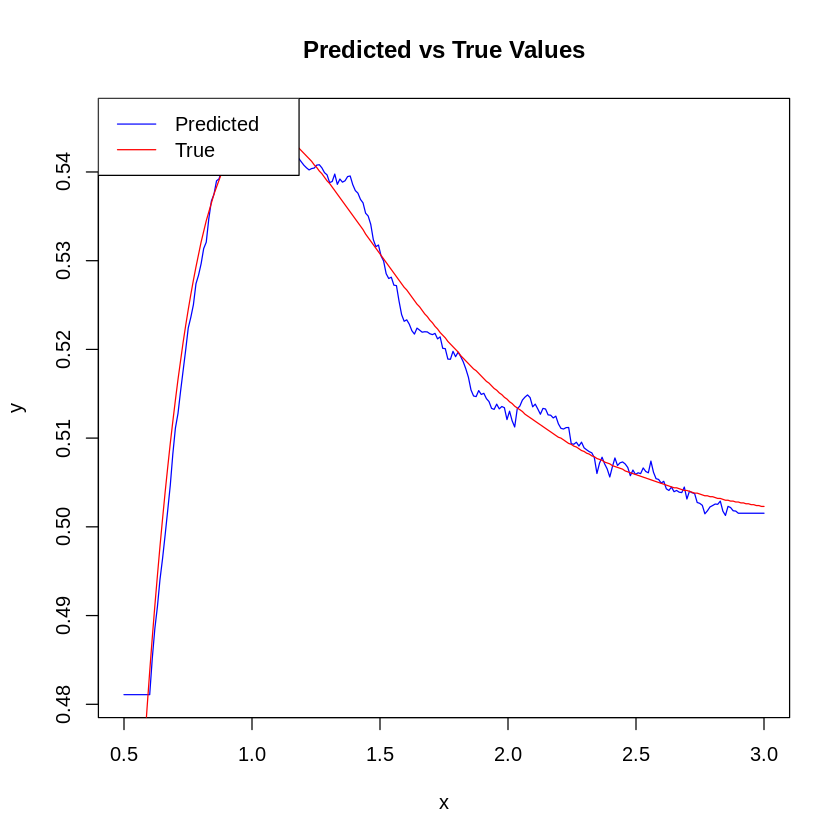

In [17]:
plot(test$x, ypred, type = "l", col = "blue",
     xlab = "x", ylab = "y", main = "Predicted vs True Values")
lines(test$x, ftrue, col = "red")
legend("topleft", legend = c("Predicted", "True"), col = c("blue", "red"), lty = 1)

In [20]:
MSE.tr = mean((ypred - train$y) ^ 2)
MSE.tr

[1] 0.0001116343

In [21]:
MSE.te = mean((ypred - test$y) ^ 2)
MSE.te

[1] 0.0001333713

In [28]:
k = 1:40
mse_results <- matrix(0, nrow = k, ncol = 2) # Initialize a matrix to store results

for (i in k) {
  fit = kknn(y ~ x, train, test, kernel = "rectangular", k = i)
  ypred <- fitted(fit)
  MSE.tr = mean((ypred - train$y) ^ 2)
  MSE.te = mean((ypred - test$y) ^ 2)

  mse_results[i, 1] <- MSE.tr # Store training MSE in the first column
  mse_results[i, 2] <- MSE.te # Store testing MSE in the second column
}

# Optionally, you can display the resulting matrix
print(mse_results)

              [,1]         [,2]
 [1,] 0.000000e+00 0.0001756413
 [2,] 5.376092e-05 0.0001355446
 [3,] 6.237762e-05 0.0001296598
 [4,] 7.525670e-05 0.0001202733
 [5,] 8.006765e-05 0.0001198681
 [6,] 7.897590e-05 0.0001189004
 [7,] 8.040113e-05 0.0001190982
 [8,] 8.293724e-05 0.0001182347
 [9,] 8.832440e-05 0.0001151667
[10,] 8.912661e-05 0.0001157800
[11,] 9.015453e-05 0.0001151994
[12,] 9.271028e-05 0.0001161079
[13,] 9.475515e-05 0.0001174644
[14,] 9.644626e-05 0.0001209127
[15,] 9.707145e-05 0.0001220789
[16,] 9.877941e-05 0.0001238754
[17,] 1.016668e-04 0.0001266983
[18,] 1.033972e-04 0.0001278784
[19,] 1.071228e-04 0.0001291774
[20,] 1.103461e-04 0.0001316362
[21,] 1.116343e-04 0.0001333713
[22,] 1.152031e-04 0.0001361866
[23,] 1.172041e-04 0.0001376214
[24,] 1.201409e-04 0.0001420562
[25,] 1.238053e-04 0.0001443745
[26,] 1.262082e-04 0.0001469633
[27,] 1.294069e-04 0.0001508876
[28,] 1.330516e-04 0.0001555247
[29,] 1.350862e-04 0.0001576094
[30,] 1.385851e-04 0.0001625613
[31,] 1.

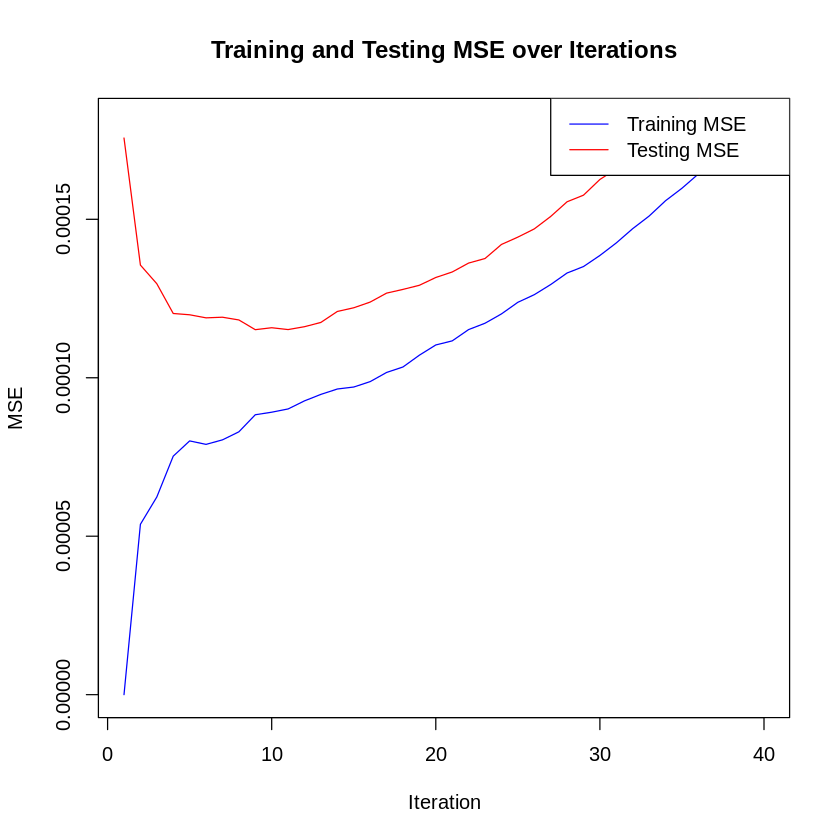

In [29]:
plot(1:k, mse_results[, 1], type = "l", col = "blue",
     xlab = "Iteration", ylab = "MSE", main = "Training and Testing MSE over Iterations")
lines(1:k, mse_results[, 2], type = "l", col = "red")
legend("topright", legend = c("Training MSE", "Testing MSE"), col = c("blue", "red"), lty = 1)

In [30]:
min_train_mse <- whichmin(mse_results[, 1])
index_min_train_mse <- which.min(mse_results[, 1])

cat("Minimum training MSE:", min_train_mse, "\n")
cat("Index of minimum training MSE:", index_min_train_mse, "\n")

Minimum training MSE: 0 
Index of minimum training MSE: 1 
